<span style="font-size: 24px">Lab 6</span>

In [190]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Определяем параметры стиля для черной темы
font_color = (1.0, 1.0, 1.0)
fig_color = (0.0, 0.0, 0.0)
subplot_color = (0.05, 0.05, 0.05)

line_color = (1.0, 1.0, 1.0)
gray_color = (0.5, 0.5, 0.5)
light_gray_color = (0.6, 0.6, 0.6)

point_color_1 = (0.25, 0.5, 1.0)
point_color_2 = (0.5, 0.75, 1.0)

lit_fontsize = 9
big_fontsize = 12
title_fontsize = 15

yellow_color = np.array([0.8, 0.8, 0.0])
green_color = np.array([0.25, 0.75, 0.25])
blue_color = np.array([0.0, 0.25, 1.0]) 
red_color = np.array([0.8, 0.0, 0.0])

skyblue_color = np.array([0.5, 0.75, 1.0])

# Мой стиль
black_style = {
    'axes.facecolor': subplot_color,              # Цвет фона осей
    'axes.edgecolor': font_color,                 # Цвет границ осей
    'axes.titlesize': title_fontsize,
    'axes.titleweight': 'bold',
    'axes.titlecolor': font_color,
    'axes.labelsize': title_fontsize,
    'axes.labelweight': 'bold',
    'axes.labelcolor': font_color,
    'axes.grid': True,                            # Включение сетки
    'grid.color': gray_color,                     # Цвет сетки
    'grid.alpha': 0.5,                            # Прозрачность сетки
    'xtick.color': font_color,                    # Цвет меток на оси x
    'ytick.color': font_color,                    # Цвет меток на оси y
    'figure.facecolor': fig_color,          # Цвет фона фигуры
    'figure.edgecolor': fig_color,          # Цвет границы фигуры
    'lines.linewidth': 3,
    'legend.fontsize': lit_fontsize,
    'legend.labelcolor': font_color,
    'legend.facecolor': fig_color, 
    'legend.edgecolor': fig_color,
}

# Применяем стиль
plt.style.use(black_style)

def grad_colors(n_colors, color_1, color_2):
    return [color_1 + (color_2 - color_1) * i / (n_colors - 1) for i in range(n_colors)]

1.

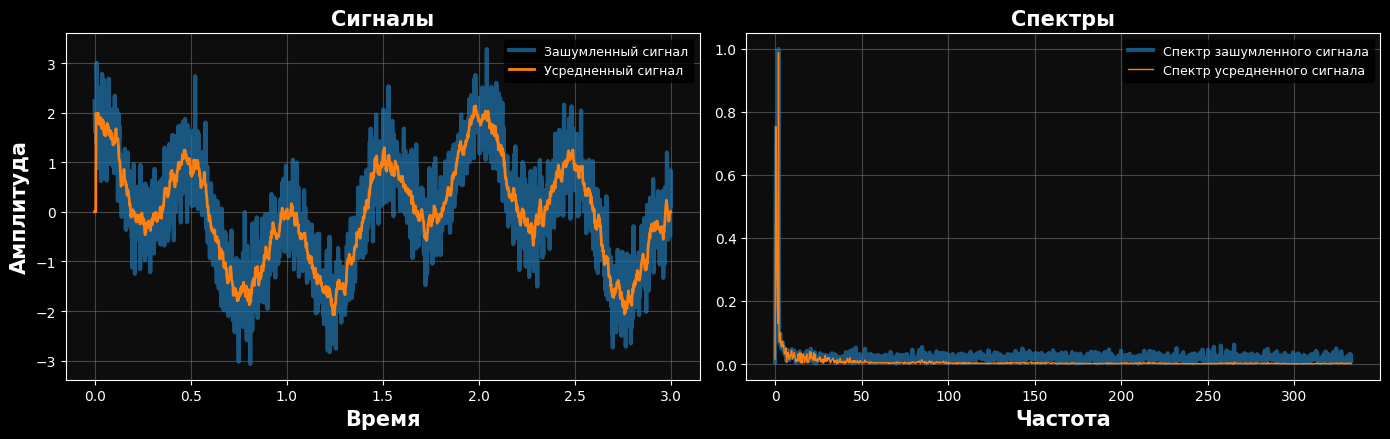

In [191]:
# Усреднение
def averaged_signal(signal, k=3):
    avg_signal = np.zeros_like(signal)
    for i in range(k, len(signal) - k):
        avg_signal[i] = (1 / (2 * k + 1)) * np.sum(signal[i - k:i + k + 1])
    return avg_signal 

# Временные характеристики
a, b = 0, 3
sampling_frequency = 2000
t = np.linspace(0, 3, sampling_frequency)
frequencies = np.fft.fftfreq(len(t), d=t[1] - t[0])

# Сигнал из суммы двух косинусов
f1 = 0.5
f2 = 2
signal = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Шум 
noise_amplitude = 0.5
noise = noise_amplitude * np.random.randn(sampling_frequency)
noisy_signal = signal + noise

# Усредненный сигнал
k = 5  # окно усреднения
avg_signal = averaged_signal(noisy_signal, k=k)

# Спектры
noisy_signal_fft = np.fft.fft(noisy_signal)
spectrum_avg_fft = np.fft.fft(avg_signal)

# Визуализация
plt.figure(figsize=(14, 4.5))

# Исходный и зашумленный сигналы
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal, label="Зашумленный сигнал", alpha=0.7)
plt.plot(t, avg_signal, label="Усредненный сигнал", linewidth=2)
plt.title("Cигналы")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend(loc='upper right')

# Спектры
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(noisy_signal_fft[:len(noisy_signal_fft)//2]) * 2 / len(t), 
         label="Спектр зашумленного сигнала", alpha=0.7)
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum_avg_fft[:len(spectrum_avg_fft)//2]) * 2 / len(t),
         label="Спектр усредненного сигнала", linewidth=1)
plt.title("Спектры")
plt.xlabel("Частота")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

2.

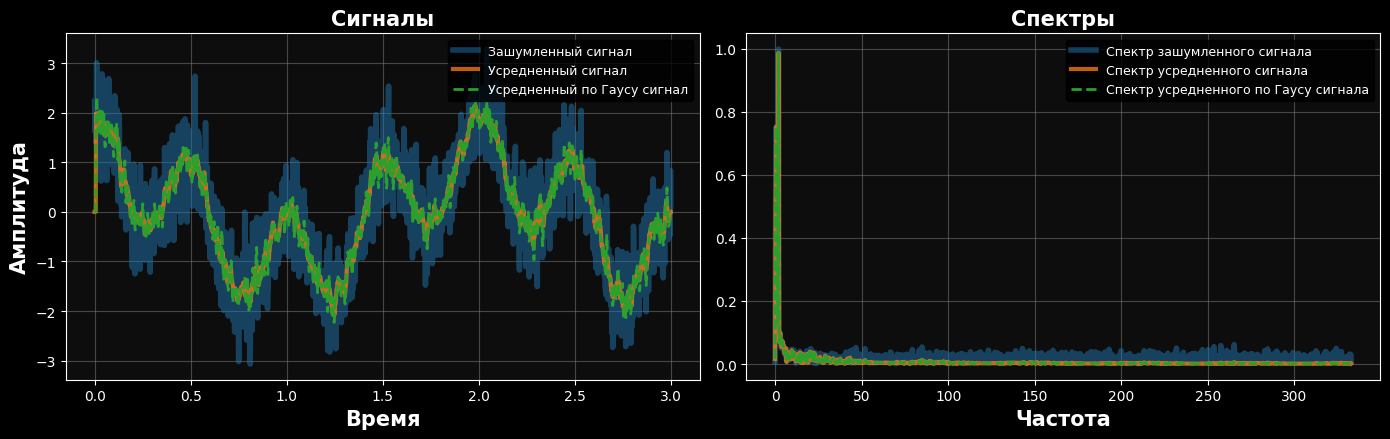

In [192]:
# Функция для усреднения с Гауссовым окном
def gaussian_weighted_signal(signal, t, k, w):
  avg_signal = np.zeros_like(signal)
  for i in range(k, len(signal) - k):
    local_t = t[i - k:i + k + 1] - t[i]  # локальное время относительно центра окна
    g = np.exp(-4 * np.log(2) * (local_t**2) / w**2)  # Гауссово окно
    g /= np.sum(g)  # нормализация весов
    avg_signal[i] = np.sum(signal[i - k:i + k + 1] * g)
  return avg_signal

# Усредненный по  Гауссу сигнал
w = 0.005  # ширина окна (секунды)
avg_signal_gaussian = gaussian_weighted_signal(noisy_signal, t, k, w=w)  # Гауссово окно
avg_signal_gaussian_fft = np.fft.fft(avg_signal_gaussian)

# Визуализация
plt.figure(figsize=(14, 4.5))

# Исходный и зашумленный сигналы
plt.subplot(1, 2, 1)
plt.plot(t, noisy_signal, label="Зашумленный сигнал", alpha=0.5, linewidth=4)
plt.plot(t, avg_signal, label="Усредненный сигнал", alpha=0.75, linewidth=3)
plt.plot(t, avg_signal_gaussian, label="Усредненный по Гаусу сигнал", linewidth=2, linestyle="--")
plt.title("Cигналы")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend(loc='upper right')

# Спектры
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(noisy_signal_fft[:len(noisy_signal_fft)//2]) * 2 / len(t), 
         label="Спектр зашумленного сигнала", alpha=0.5, linewidth=4)
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum_avg_fft[:len(spectrum_avg_fft)//2]) * 2 / len(t),
         label="Спектр усредненного сигнала", alpha=0.75, linewidth=3)
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum_avg_fft[:len(spectrum_avg_fft)//2]) * 2 / len(t),
         label="Спектр усредненного по Гаусу сигнала", linewidth=2, linestyle="--")
plt.title("Спектры")
plt.xlabel("Частота")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

3.

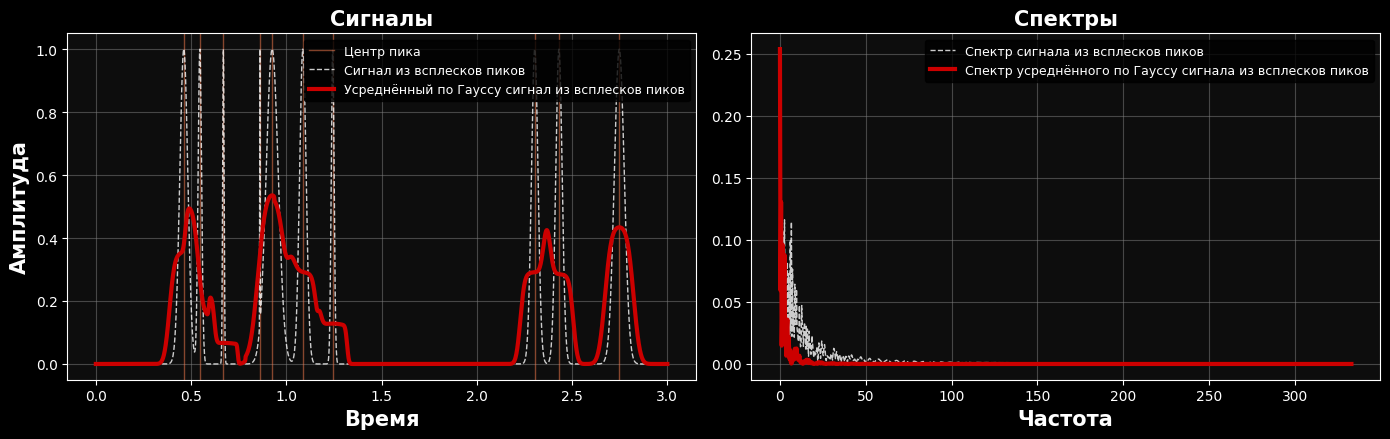

In [193]:
# Функция для генерации сигнала с пиками
def peak_signal(t, num_peaks=10):
    np.random.seed(215)  # Для воспроизводимости
    signal = np.zeros_like(t) 
    peak_centers = [] # Хранение центров пиков для визуализации
    for _ in range(num_peaks):
        center = np.random.uniform(t[0], t[-1])  # Случайный центр всплеска
        width = np.random.uniform(0.001, 0.1)  # Случайная ширина всплеска
        peak = np.exp(-4 * np.log(2) * ((t - center)**2) / width**2)  # Гауссов пик
        
        potential_signal = signal + peak
        excess_mask = potential_signal > 1  # Где превышается амплитуда
        peak[excess_mask] = 1 - signal[excess_mask] # Корректировка пика
        signal += peak  # Добавляем скорректированный пик
        peak_centers.append(center)

    return signal, peak_centers

# Cигнал с пиками
num_peaks = 10  # Количество всплесков
k = 50  # окно усреднения
w = 0.5  # ширина окна (секунды)
pk_signal, pk_centers = peak_signal(t, num_peaks=num_peaks)
avg_pk_signal_gaussian = gaussian_weighted_signal(pk_signal, t, k, w=w)  # Гауссово окно
pk_signal_fft = np.fft.fft(pk_signal)
avg_pk_signal_gaussian_fft = np.fft.fft(avg_pk_signal_gaussian)

# Визуализация
plt.figure(figsize=(14, 4.5))

# Исходный сигнал и усреднённый
plt.subplot(1, 2, 1)

# Добавление вертикальных линий в центрах пиков
for center in pk_centers:
    plt.axvline(x=center, label="Центр пика" if center == pk_centers[0] else "", color='coral', linewidth=1, alpha=0.5)
    
plt.plot(t, pk_signal, label="Сигнал из всплесков пиков", linestyle='--', linewidth=1, color=font_color, alpha=0.8)
plt.plot(t, avg_pk_signal_gaussian, label="Усреднённый по Гауссу сигнал из всплесков пиков", color=red_color)

plt.title("Сигналы")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend(loc='upper right')

# Спектры
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(pk_signal_fft[:len(pk_signal_fft)//2]) * 2 / len(t), 
         label="Спектр cигнала из всплесков пиков", alpha=0.8, linestyle='--', linewidth=1, color=font_color)
plt.plot(frequencies[:len(frequencies)//2], np.abs(avg_pk_signal_gaussian_fft[:len(avg_pk_signal_gaussian_fft)//2]) * 2 / len(t), 
         label="Спектр усреднённого по Гауссу cигнала из всплесков пиков", color=red_color)
plt.title("Спектры")
plt.xlabel("Частота")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


4.

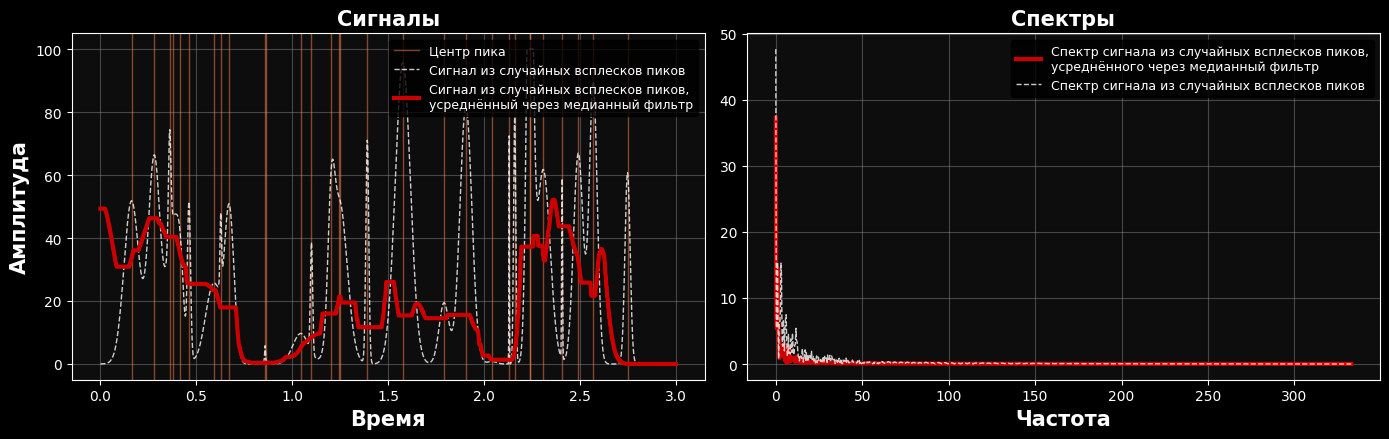

In [194]:
# Функция для генерации сигнала с пиками
def random_peak_signal(t, num_peaks=10, max_amplitude=1):
    np.random.seed(215)  # Для воспроизводимости
    signal = np.zeros_like(t) 
    peak_centers = [] # Хранение центров пиков для визуализации
    for _ in range(num_peaks):
        center = np.random.uniform(t[0], t[-1])  # Случайный центр всплеска
        amplitude = np.random.uniform(0, max_amplitude)
        width = np.random.uniform(0.001, 0.1)  # Случайная ширина всплеска
        peak = amplitude * np.exp(-4 * np.log(2) * ((t - center)**2) / width**2)  # Гауссов пик
        
        potential_signal = signal + peak
        excess_mask = potential_signal > max_amplitude  # Где превышается амплитуда
        peak[excess_mask] = max_amplitude - signal[excess_mask] # Корректировка пика
        signal += peak  # Добавляем скорректированный пик
        peak_centers.append(center)

    return signal, peak_centers

# Функция применения медианного фильтра к сигналу
def median_filter(signal, mean_window=3):
    if mean_window < 1:
        raise ValueError("Размер окна должен быть положительным.")
    
    # Определяем, какой элемент выбирать для медианы
    fix_median = -1 if mean_window % 2 == True else 0
    half_window = mean_window // 2
    median_index = half_window + fix_median
    filtered_signal = np.zeros_like(signal)
    
    for i in range(len(signal)):
        left_window_index = max(0, i - half_window) # Определяем границы окна
        right_window_index = min(len(signal), i + half_window + 1)
        window = np.sort(signal[left_window_index:right_window_index]) # Берём элементы в окне и сортируем
        filtered_signal[i] = window[median_index] # Используем предвычисленный индекс медианы
    
    return filtered_signal


# Cигнал со случайными пиками
num_peaks = 30  # Количество всплесков
max_amplitude = 100 # Максимальное значение амплитуды
mean_window = 200  # ширина окна (секунды)
rand_pk_signal, pk_centers = random_peak_signal(t, num_peaks=num_peaks, max_amplitude=max_amplitude)
filtered_rand_pk_signal = median_filter(rand_pk_signal, mean_window=mean_window)
rand_pk_signal_fft = np.fft.fft(rand_pk_signal)
filtered_rand_pk_signal_fft = np.fft.fft(filtered_rand_pk_signal)

# Визуализация
plt.figure(figsize=(14, 4.5))

# Исходный сигнал и усреднённый
plt.subplot(1, 2, 1)

# Добавление вертикальных линий в центрах пиков
for center in pk_centers:
    plt.axvline(x=center, label="Центр пика" if center == pk_centers[0] else "", color='coral', linewidth=1, alpha=0.5)
    
plt.plot(t, rand_pk_signal, label="Сигнал из случайных всплесков пиков", linestyle='--', linewidth=1, color=font_color, alpha=0.8)
plt.plot(t, filtered_rand_pk_signal, label="Сигнал из случайных всплесков пиков,\nусреднённый через медианный фильтр", color=red_color)

plt.title("Сигналы")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend(loc='upper right')

# Спектры
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_rand_pk_signal_fft[:len(filtered_rand_pk_signal_fft)//2]) * 2 / len(t), 
         label="Спектр сигнала из случайных всплесков пиков,\nусреднённого через медианный фильтр", color=red_color)
plt.plot(frequencies[:len(frequencies)//2], np.abs(rand_pk_signal_fft[:len(rand_pk_signal_fft)//2]) * 2 / len(t), 
         label="Спектр cигнала из случайных всплесков пиков", alpha=0.8, linestyle='--', linewidth=1, color=font_color)
plt.title("Спектры")
plt.xlabel("Частота")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


5.

Степень полинома   | BIC           | ε (Дисперсия ошибки)
---------------------------------------------------------
1                  | 150.18251     | 1.07389
2                  | 145.84191     | 1.06750
3                  | 153.42723     | 1.06749
4                  | -35.21199     | 0.96772
5                  | -27.62088     | 0.96772
6                  | -328.02264    | 0.82960
7                  | -320.45249    | 0.82959
8                  | -811.06649    | 0.64666
9                  | -803.46721    | 0.64666
10                 | -1132.67372   | 0.54643

Минимальный BIC -1132.67372 для полинома со степенью 10


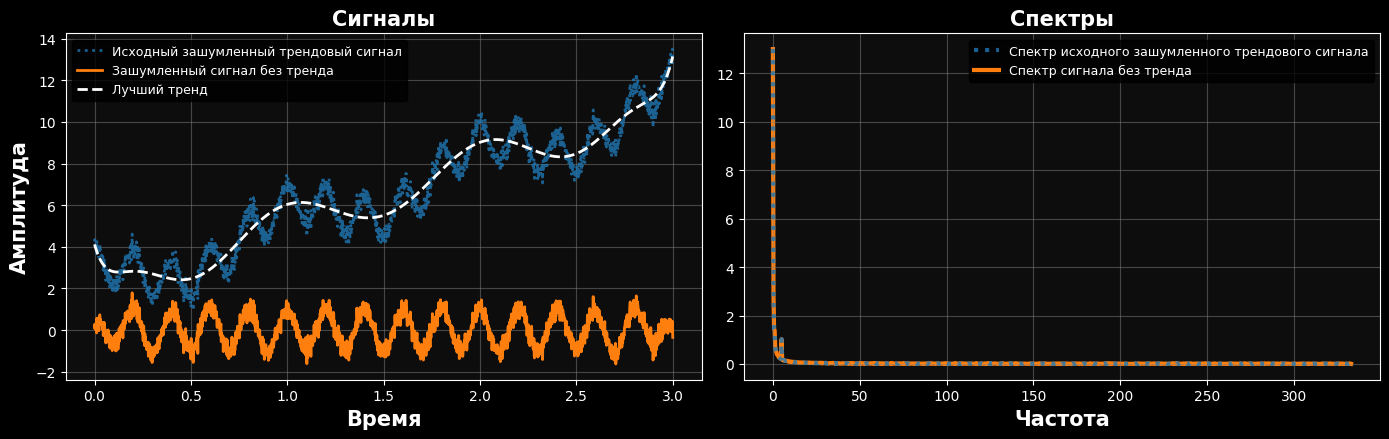

In [212]:
# Функция для добавления линейного тренда в сигнал
def add_linear_trend(t, signal, trend_k=0.5, trend_b=0):
  linear_trend = trend_k * t + trend_b  # Линейный тренд
  trend_signal = linear_trend + signal
  return trend_signal

# Определяем BIC и исключаем тренд
def remove_trend_bic(t, signal, num_poly_degrees=3):
  n = len(signal)
  poly_degrees = [int(d) for d in range(1, num_poly_degrees+1)]
  bic_scores, dispersions, best_trend, best_bic, best_degree = [], [], None, float('inf'), None
  
  for k in poly_degrees:
    # Полиномиальная аппроксимация
    coefficients = np.polyfit(t, signal, k)
    trend = np.polyval(coefficients, t)
    
    # Дисперсия ошибки (ε)
    dispersion = np.mean((signal - trend)** 2)
    dispersions.append(dispersion)
    
    # Вычисление BIC
    bic = n * np.log(dispersion) + k * np.log(n)
    bic_scores.append(bic)
    
    if bic <= best_bic:
      best_bic = bic
      best_trend = trend
      best_degree = k

  return signal - best_trend, poly_degrees, bic_scores, dispersions, best_trend, best_bic, best_degree

# Сигнал из суммы двух косинусов
f1 = 1
f2 = 5
signal = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)

# Шум 
noise_amplitude = 0.25
noise = noise_amplitude * np.random.randn(sampling_frequency)
noisy_signal = signal + noise

# Тренд
trend_k = 3
trend_b = 2
trend_noisy_signal = add_linear_trend(t, noisy_signal, trend_k=trend_k, trend_b=trend_b)

# Исключаем тренд
num_poly_degrees = 10 # Максимальная степень полинома, до которой надо проверить
detrended_signal, poly_degrees, bic_scores, dispersions, best_trend, best_bic, best_degree = remove_trend_bic(t, trend_noisy_signal, 
                                                                                            num_poly_degrees=num_poly_degrees)

trend_noisy_signal_fft = np.fft.fft(trend_noisy_signal)
detrended_signal_fft = np.fft.fft(detrended_signal)

# Вывод результатов
print("Степень полинома   | BIC           | ε (Дисперсия ошибки)")
print("---------------------------------------------------------")
for degree, bic, dispersion in zip(poly_degrees, bic_scores, dispersions):
  print(f"{degree:<18} | {bic:<13.5f} | {dispersion:.5f}")

print(f"\nМинимальный BIC {best_bic:.5f} для полинома со степенью {best_degree}")

# Визуализация
plt.figure(figsize=(14, 4.5))

# Сигналы
plt.subplot(1, 2, 1)
plt.plot(t, trend_noisy_signal, label="Исходный зашумленный трендовый сигнал", alpha=0.8, linestyle=':', linewidth=2)
plt.plot(t, detrended_signal, label="Зашумленный сигнал без тренда", linewidth=2)
plt.plot(t, best_trend, label="Лучший тренд", linestyle='--', linewidth=2, color=font_color)

plt.title("Сигналы")
plt.xlabel("Время")
plt.ylabel("Амплитуда")
plt.legend(loc='upper left')

# Спектры
plt.subplot(1, 2, 2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(trend_noisy_signal_fft[:len(trend_noisy_signal_fft)//2]) * 2 / len(t), 
         label="Спектр исходного зашумленного трендового сигнала", alpha=0.8, linestyle=':', zorder=2)
plt.plot(frequencies[:len(frequencies)//2], np.abs(trend_noisy_signal_fft[:len(trend_noisy_signal_fft)//2]) * 2 / len(t), 
         label="Спектр сигнала без тренда", zorder=1)
plt.title("Спектры")
plt.xlabel("Частота")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
